

# Support Vector Machine (SVM)

Support Vector Machines (SVMs) are supervised learning algorithms used for **classification**, **regression**, and **outlier detection**.

## Advantages

* **Effective in high-dimensional spaces**
  SVMs perform well even when the number of features is large.

* **Robust when features exceed samples**
  They remain effective when the number of dimensions is greater than the number of training samples.

* **Memory efficient**
  Only a subset of the training data (called *support vectors*) is used to define the decision boundary.

* **Highly versatile**
  Different kernel functions can be used for the decision function. Common kernels are provided, and custom kernels can also be defined.

## Disadvantages

* **Risk of overfitting**
  When the number of features is much larger than the number of samples, careful selection of the kernel function and regularization parameter is crucial.

* **No native probability estimates**
  SVMs do not directly provide probability outputs. Probabilities are computed using an expensive procedure such as five-fold cross-validation.





###  Understanding the Terminology

* **Samples (or Data Points, $n$):** This is the number of rows in your dataset. If you have 100 customer records, you have 100 samples.
* **Dimensions (or Features, $p$):** This is the number of columns in your dataset (the variables used to describe each sample). If you record a customer's age, income, and purchase frequency, you have 3 dimensions/features.

###  What is the Problem When $p > n$? (More Dimensions than Samples)

In many traditional statistical models and machine learning algorithms, having **many more features ($p$) than samples ($n$)** creates a major problem known as the **"curse of dimensionality"** or an **ill-posed problem**.

* **Overfitting:** With too many features, the model can essentially memorize the few training samples perfectly (including their noise), leading to extremely poor performance on new, unseen data.
* **Computational Cost:** Calculations become exponentially more demanding.
* **Statistical Instability:** The model often becomes unstable because there's not enough data to reliably estimate the relationships for all those features.

###  Why are SVMs Still Effective When $p > n$?

This is where the unique mathematical formulation of the SVM comes into play.

#### 1. Focus on the Boundary

* **SVM's Goal:** An SVM does not try to model the entire data distribution. Its primary goal is only to find the optimal **separating hyperplane**—the decision boundary that maximizes the distance (margin) to the nearest data points of any class.
* **The Key:** The hyperplane is defined *only* by a very small subset of the training points called the **Support Vectors** (the samples closest to the margin).

#### 2. The Power of the Kernel Trick

* **Implicit Mapping:** The **Kernel Trick** allows the SVM to operate in a very high-dimensional feature space (where the data might be separable) **without ever explicitly calculating the coordinates** of the data in that space. It only calculates the *similarity* (dot product) between pairs of data points using the kernel function.
* **Complexity:** The complexity of the SVM solution depends more on the **number of support vectors** than the total number of features. Since the number of support vectors is often small (and cannot exceed $n$), the algorithm remains computationally feasible and statistically robust even when $p$ is very large (sometimes even infinite, as with the RBF/Gaussian kernel).



## Classification

SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.<br>
SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section Mathematical formulation). On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. It also lacks some of the attributes of SVC and NuSVC, like support_. LinearSVC uses squared_hinge loss and due to its implementation in liblinear it also regularizes the intercept, if considered. This effect can however be reduced by carefully fine tuning its intercept_scaling parameter, which allows the intercept term to have a different regularization behavior compared to the other features. The classification results and score can therefore differ from the other two classifiers.

## Multi-class classification

**SVMs are natively Binary Classifiers.**

By definition, an SVM draws a single line (hyperplane) to separate **two** groups. It cannot natively draw a line that separates 3 or 4 groups at the same time.

To perform **Multi-class Classification** (e.g., classifying a fruit as Apple, Banana, OR Orange), SVM uses one of two "tricks" to combine multiple binary classifiers.

---

### The Two Strategies

Scikit-Learn handles these strategies automatically, but it is important to know which one is being used.

#### 1. One-vs-Rest (OvR) / One-vs-All
*   **Logic:** It treats the problem as "Class A vs. Everyone Else."
*   **How it works:** If you have 3 classes (Apple, Banana, Orange), it trains 3 separate models:
    1.  Apple vs. [Banana + Orange]
    2.  Banana vs. [Apple + Orange]
    3.  Orange vs. [Apple + Banana]
*   **Result:** The model with the highest confidence score wins.

#### 2. One-vs-One (OvO)
*   **Logic:** It pairs every class against every other class in a "Round Robin" tournament.
*   **How it works:** For 3 classes, it trains models for:
    1.  Apple vs. Banana
    2.  Apple vs. Orange
    3.  Banana vs. Orange
*   **Result:** The class that wins the most "duels" is selected as the prediction.
*   **Note:** This is the default behavior in Scikit-Learn's `SVC` class.

---

### Code Example (Using the Iris Dataset)

Since your previous dataset (Banknote) only has 2 classes, we cannot use it for this example. We will use the famous **Iris Dataset** (3 classes of flowers) to demonstrate.

Notice that the code is almost identical to the binary version; Scikit-Learn hides the complexity for you.

```python
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. LOAD DATA (Iris has 3 classes: Setosa, Versicolor, Virginica)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. SCALE DATA (Still required!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. TRAIN SVM (Multi-class happens here)
# 'decision_function_shape' controls the strategy.
# 'ovo' = One-vs-One (Default for SVC)
# 'ovr' = One-vs-Rest
svm_model = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
svm_model.fit(X_train, y_train)

# 5. PREDICT
predictions = svm_model.predict(X_test)

# 6. EVALUATE
print("--- Confusion Matrix (3x3) ---")
# You will see a 3x3 matrix now instead of 2x2
print(confusion_matrix(y_test, predictions))

print("\n--- Classification Report ---")
print(classification_report(y_test, predictions, target_names=iris.target_names))
```

### Key Changes in the Code
1.  **`decision_function_shape='ovo'`**: Inside the `SVC(...)` definition, you can specify the strategy.
    *   If you leave this blank, `SVC` uses One-vs-One by default.
    *   If you use `LinearSVC` (a faster version for linear kernels), it uses One-vs-Rest by default.
2.  **Confusion Matrix**: The output will now be a grid of size $N \times N$ (where $N$ is the number of classes). The diagonal line (top-left to bottom-right) represents correct predictions, and any numbers outside that diagonal represent confusion between specific classes.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. LOAD THE DATA
url = "https://raw.githubusercontent.com/AbhiRoy96/Banknote-Authentication-UCI-Dataset/master/bank_notes.csv"

# Note: This specific CSV does not have a header row, so we define names manually
# column_names = ["variance", "skewness", "kurtosis", "entropy", "class"]
df = pd.read_csv(url)

print("Data loaded successfully!")
print(df.head())

# 2. SEPARATE FEATURES (X) AND TARGET (y)
X = df.drop('Target', axis=1)  # All columns except 'class'
y = df['Target']               # Only the 'class' column

# 3. SPLIT INTO TRAINING AND TESTING SETS
# We train on 80% of data, test on 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 4. APPLY STANDARD SCALER
# SVM requires data to be on the same scale
scaler = StandardScaler()

# Fit on training set only, then transform both
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. TRAIN THE SVM MODEL
# We use the SVC (Support Vector Classifier) class
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# 6. MAKE PREDICTIONS
predictions = svm_model.predict(X_test)

# 7. EVALUATE
print("\n--- Accuracy Score ---")
print(f"{accuracy_score(y_test, predictions)*100:.2f}%")

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, predictions))

print("\n--- Classification Report ---")
print(classification_report(y_test, predictions))

Data loaded successfully!
   variance  skewness  curtosis  entropy  Target
0   3.62160    8.6661   -2.8073 -0.44699       0
1   4.54590    8.1674   -2.4586 -1.46210       0
2   3.86600   -2.6383    1.9242  0.10645       0
3   3.45660    9.5228   -4.0112 -3.59440       0
4   0.32924   -4.4552    4.5718 -0.98880       0

--- Accuracy Score ---
100.00%

--- Confusion Matrix ---
[[148   0]
 [  0 127]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Data loaded successfully!
   variance  skewness  curtosis  entropy  Target
0   3.62160    8.6661   -2.8073 -0.44699       0
1   4.54590    8.1674   -2.4586 -1.46210       0
2   3.86600   -2.6383    1.9242  0.10645       0
3   3.45660    9.5228   -4.0112 -3.59440       0
4   0.32924   -4.4552    4.5718 -0.98880       0

--- Generating Pair Plot of Features ---


<Figure size 1000x1000 with 0 Axes>

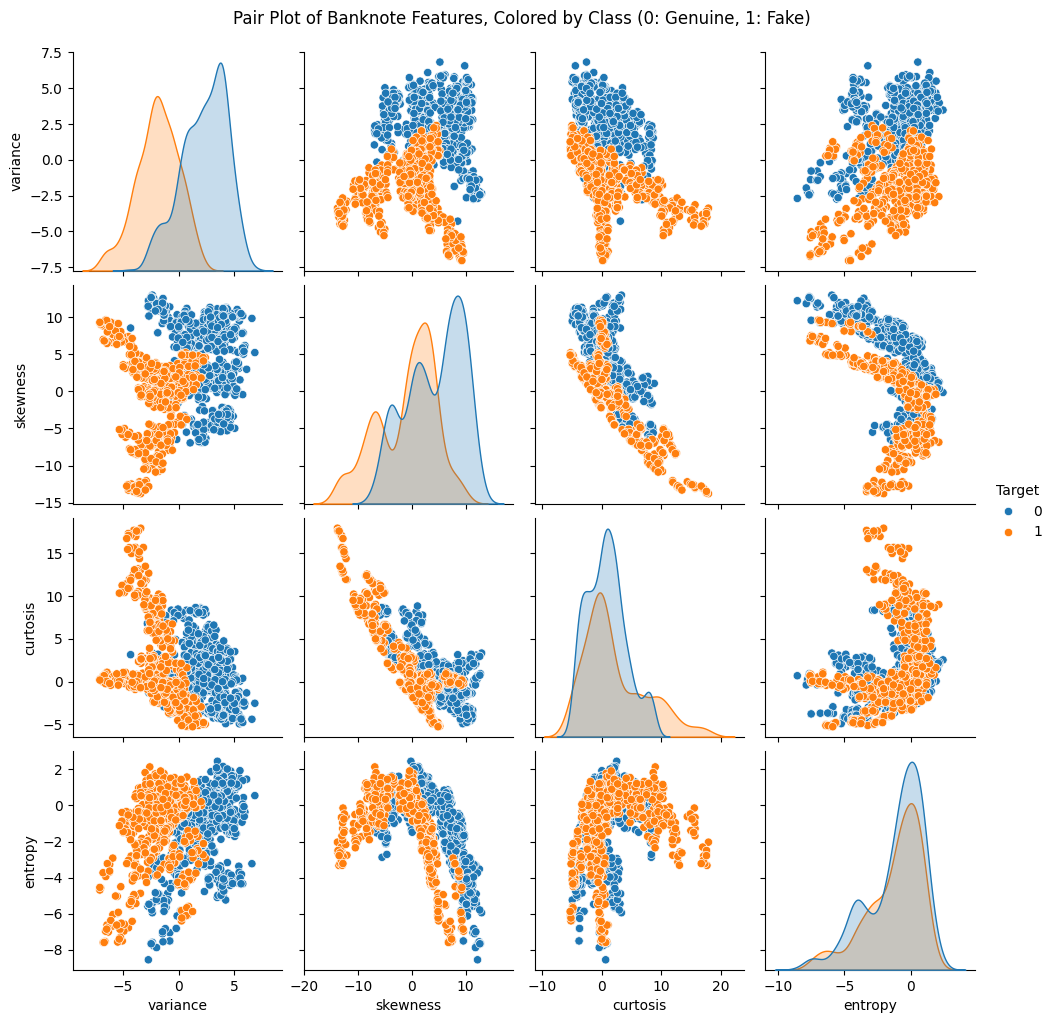


--- Accuracy Score ---
Accuracy: 100.00%

--- Confusion Matrix ---
[[148   0]
 [  0 127]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


--- Generating Confusion Matrix Plot ---


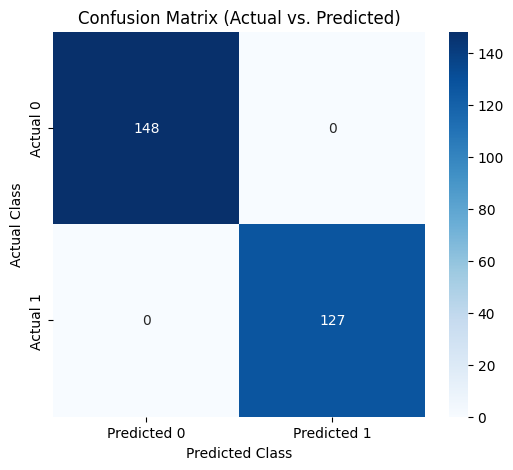


--- Generating 2D Decision Boundary Plot ---


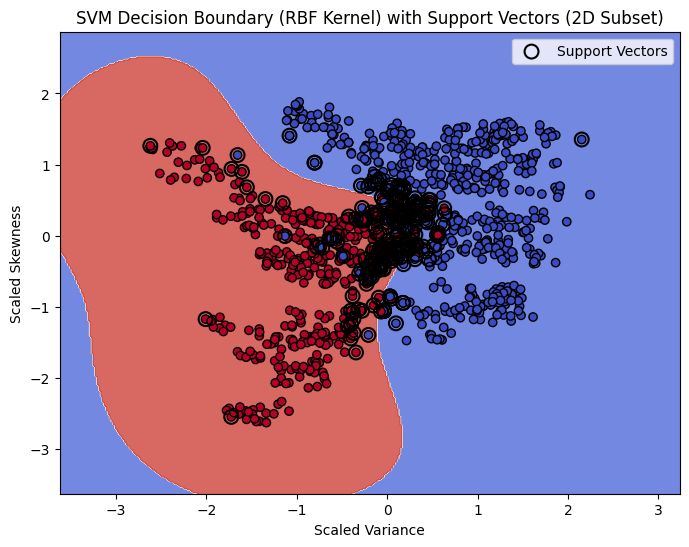

In [4]:
import pandas as pd
import numpy as np # Needed for the plotting part
import matplotlib.pyplot as plt
import seaborn as sns # Used for better data/matrix visualization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. LOAD THE DATA
url = "https://raw.githubusercontent.com/AbhiRoy96/Banknote-Authentication-UCI-Dataset/master/bank_notes.csv"

# Note: The original dataset names its columns differently, let's ensure
# we have the correct names based on the CSV structure.
# The original CSV usually loads with a header, but the GitHub version might not.
# Assuming the loaded CSV has 'variance', 'skewness', 'kurtosis', 'entropy', 'Target'
df = pd.read_csv(url)

# Rename columns if the CSV didn't load headers properly (to be safe)
if df.shape[1] == 5 and 'Target' not in df.columns:
    df.columns = ["variance", "skewness", "kurtosis", "entropy", "Target"]

print("Data loaded successfully!")
print(df.head())

# --- NEW VISUALIZATION ADDITION 1: Pair Plot ---
# Visualize the relationships between all pairs of features, colored by the target class.
print("\n--- Generating Pair Plot of Features ---")
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue='Target', diag_kind='kde')
plt.suptitle("Pair Plot of Banknote Features, Colored by Class (0: Genuine, 1: Fake)", y=1.02)
plt.show()


# 2. SEPARATE FEATURES (X) AND TARGET (y)
X = df.drop('Target', axis=1)
y = df['Target']

# 3. SPLIT INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 4. APPLY STANDARD SCALER
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. TRAIN THE SVM MODEL
# We use RBF kernel as it's highly effective for non-linear separation
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# 6. MAKE PREDICTIONS
predictions = svm_model.predict(X_test)

# 7. EVALUATE
print("\n--- Accuracy Score ---")
print(f"Accuracy: {accuracy_score(y_test, predictions)*100:.2f}%")

cm = confusion_matrix(y_test, predictions)
print("\n--- Confusion Matrix ---")
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test, predictions))

# --- NEW VISUALIZATION ADDITION 2: Confusion Matrix Plot ---
print("\n--- Generating Confusion Matrix Plot ---")
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Actual vs. Predicted)")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# 8. VISUALIZE SUPPORT VECTORS (Bonus for 2D only)
# To visualize the decision boundary, we must reduce the data to 2 dimensions.
# We will use the two most important features (often variance and skewness).

# Retrain an SVM using only the first two features of the SCALED data for visualization
X_2d = X_train[:, :2]
svm_model_2d = SVC(kernel='rbf', random_state=42)
svm_model_2d.fit(X_2d, y_train)

print("\n--- Generating 2D Decision Boundary Plot ---")
# Create a mesh grid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for every point in the mesh
Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot the decision boundary and the margin
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')

# Highlight the Support Vectors
plt.scatter(svm_model_2d.support_vectors_[:, 0], svm_model_2d.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.xlabel('Scaled Variance')
plt.ylabel('Scaled Skewness')
plt.title('SVM Decision Boundary (RBF Kernel) with Support Vectors (2D Subset)')
plt.legend()
plt.show()